# Desafio evaluado s2

## Analisis lineal discriminante

* default: Variable Binaria. Registra si el clienteentró en morosidad o no.
* income: Ingreso promedio declarado por el cliente.
* balance: total del saldo en la cuenta de crédito.
* student: Variable binaria. Registra si el clientees estudiante o no.



### Ejercicio 1: Preparar el ambiente de trabajo

* Importar Librerias

In [1]:
# Librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder , StandardScaler, LabelBinarizer

#model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Metrrics
from sklearn.metrics import classification_report

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

* Agregue la base de datos en el ambiente de trabajo.

In [2]:
df = pd.read_csv('default_credit.csv')

In [3]:
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
df = df.drop(columns='index')

In [5]:
df.sample()

,default,student,balance,income
5699,No,No,1027.825307,33089.467295


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [7]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [8]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [9]:
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

In [10]:
df.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


* Inspeccione la distribución de cada atributo.

In [11]:
parametros = df.columns
parametros = parametros.tolist()

In [12]:
parametros.remove('default')

In [13]:
parametros

['student', 'balance', 'income']

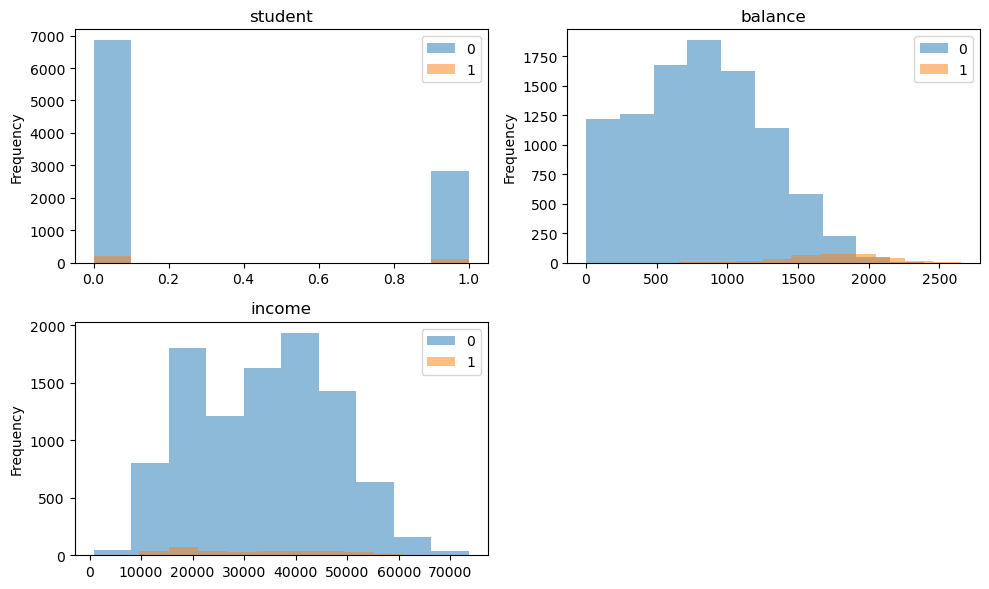

In [14]:
plt.figure(figsize=(10, 6))
for n, i in enumerate(parametros):
    plt.subplot(2, 2, n + 1)
    df.groupby('default')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['default'].unique())
    plt.title(i)
    plt.tight_layout()

* Claramente notamos como los casos en que se encuentra en situacion de default son muy pocos, esto traera repercuciones en la capacidad del modelo para detectar esta caracteristica.

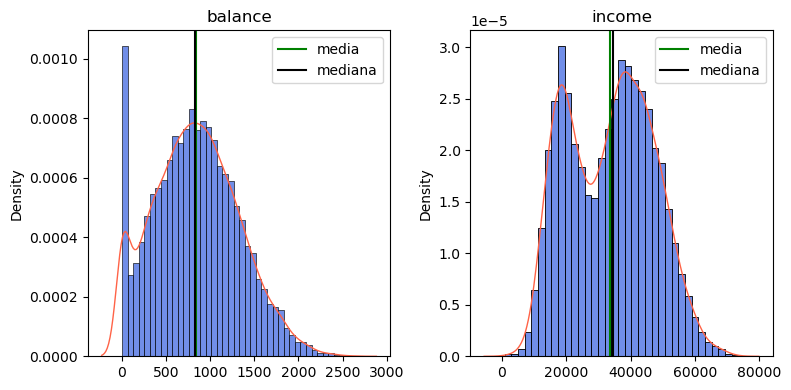

In [15]:
fig = plt.figure(figsize=(8,4))  # tamaño de la figura
fig.subplots_adjust(hspace=.4)  # ajuste de las subplots

for n, col in enumerate( ['balance', 'income']):
    plt.subplot(1, 2, n+1)
    sns.histplot(df[col], stat='density', color='royalblue')
    sns.kdeplot(df[col], color='tomato', lw=1)
    plt.axvline(df[col].mean(), color='green', label='media')
    plt.axvline(df[col].median(), color='black', label='mediana')
    plt.title(col)
    plt.xlabel("")
    plt.legend()
    plt.tight_layout()


* Balance se comporta casi similar a una distribucion normal, sin embargo presenta una alta concentracion cercana a 0. A pesar de esto no difiere en mayor magnitud la media de la mediana
* Income si bien no es tan bueno su comprotamiento, no muestra un gran desvío entre la media y la mediana.

<AxesSubplot:xlabel='default', ylabel='count'>

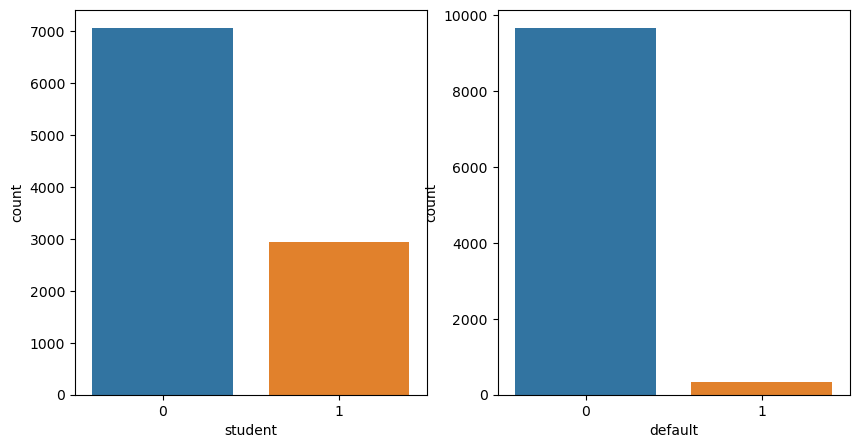

In [16]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.8)
plt.subplot(1,2,1)
sns.countplot(data=df, x='student')
plt.subplot(1,2,2)
sns.countplot(data=df, x='default')


* Student a esta cargada hacia quienes no son estudiantes
* Default deja clara la minima cantidad de valores positivos.

### Ejercicio 2: Modelo base

* Recuerde que los modelos de sklearn no soportan datos que no sean numéricos.Transforme los atributos pertinentes conLabelEncoder.
    - Ya se transformaron los datos anteriormente.
    - df['default'] = LabelEncoder().fit_transform(df['default'])
    - df['student'] = LabelEncoder().fit_transform(df['student'])

* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.

In [17]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(df.loc[:,parametros], df['default'],
                                                             test_size =.33, random_state = 1991)
scaler = StandardScaler().fit(X_train_pre)
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 3)
(3300, 3)
(6700,)
(3300,)


* Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiper parámetros. Genere métricas de evaluación utilizando classification_report.

In [19]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
lda_model.coef_

array([[-0.15336378,  2.30593392,  0.16150448]])

In [21]:
lda_pred = lda_model.predict(X_test)

In [22]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3188
           1       0.78      0.22      0.35       112

    accuracy                           0.97      3300
   macro avg       0.88      0.61      0.67      3300
weighted avg       0.97      0.97      0.96      3300



In [23]:
print("Probabilidades a priori\n", lda_model.priors_, "\n")
print("Medias de atributos en cada clase\n",
lda_model.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",
lda_model.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.96701493 0.03298507] 

Medias de atributos en cada clase
 [[-0.01 -0.06  0.  ]
 [ 0.19  1.9  -0.06]] 

Varianza explicada por cada discriminante
 [1.] 



* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.
    - El modelo para predecir los valores cuando no se encuentra en default (0) es muy bueno
    - En cambio para predecir cuando se encuentra en default tiene muy bajo rendimiento,F1 un 15% por bajo del 50%, por lo cual presenta dificultades para predecir este valor por si solo
    - A pesar que precision no es bajo se castiga mucho su falencia en detectar correctamente los datos con un recall de 22%
    - A modo general el modelo muestra un buen rendimiento con un acuracy de 97%

### Ejercicio 3: Refactorizacion 1 informacion a priori

* Dado que trabajamos con modelos generativos, podemos incluir información exógena. Para este caso agregaremos dos distribuciones:
    - Asumamos que hay un 50/50 de morosos y no morosos.
    - Asumamos que hay un 60/40 de morosos y no morosos.

In [24]:
lda_model_50 = LinearDiscriminantAnalysis(priors=[0.5,0.5])
lda_model_50.fit(X_train, y_train)
lda_pred_50 = lda_model_50.predict(X_test)
print(classification_report(y_test, lda_pred_50))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3188
           1       0.17      0.92      0.29       112

    accuracy                           0.85      3300
   macro avg       0.59      0.88      0.60      3300
weighted avg       0.97      0.85      0.89      3300



In [25]:
print("Probabilidades a priori\n", lda_model_50.priors_, "\n")
print("Medias de atributos en cada clase\n",
lda_model_50.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",
lda_model_50.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.01 -0.06  0.  ]
 [ 0.19  1.9  -0.06]] 

Varianza explicada por cada discriminante
 [1.] 



In [26]:
lda_model_60 = LinearDiscriminantAnalysis(priors=[0.6,0.4])
lda_model_60.fit(X_train, y_train)
lda_pred_60 = lda_model_60.predict(X_test)
print(classification_report(y_test, lda_pred_60))

              precision    recall  f1-score   support

           0       0.99      0.88      0.94      3188
           1       0.21      0.85      0.33       112

    accuracy                           0.88      3300
   macro avg       0.60      0.87      0.63      3300
weighted avg       0.97      0.88      0.92      3300



In [27]:
print("Probabilidades a priori\n", lda_model_60.priors_, "\n")
print("Medias de atributos en cada clase\n",
lda_model_60.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",
lda_model_60.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.6 0.4] 

Medias de atributos en cada clase
 [[-0.01 -0.06  0.  ]
 [ 0.19  1.9  -0.06]] 

Varianza explicada por cada discriminante
 [1.] 



* Si observamos F1-score ambos modelos siguen siendo deficientes a la hora de predecir los casos de default = 1
* y el comportamiento general del modelo empeora

### Ejercicio 4: Refactorizacion 2 - Ovversampling

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
# Instanciamos la clase
oversampler = SMOTE(random_state=1991, sampling_strategy='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train,
y_train)

In [30]:
print(X_train_oversamp.shape)
print(y_train_oversamp.shape)


(12958, 3)
(12958,)


In [31]:
y_train_oversamp.value_counts()

0    6479
1    6479
Name: default, dtype: int64

In [32]:
lda_model_ovs = LinearDiscriminantAnalysis()
lda_model_ovs.fit(X_train_oversamp, y_train_oversamp)
lda_pred_ovs = lda_model_ovs.predict(X_test)
print(classification_report(y_test, lda_pred_ovs))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3188
           1       0.17      0.92      0.29       112

    accuracy                           0.85      3300
   macro avg       0.58      0.88      0.60      3300
weighted avg       0.97      0.85      0.89      3300



* El modelo no mejora en predecir los casos en que default es 1
* En general disminuye el accuracy del modelo.

### Ejercicio 5: Refactorizacion 3 - QDA

* Por último,implementeunmodeloQuadraticDiscriminantAnalysis conlosdatos aumentados artificialmente. Genere las métricas de desempeño.

In [33]:
qda_model_ovs = QuadraticDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)
qda_pred_ovs = qda_model_ovs.predict(X_test)
print(classification_report(y_test, qda_pred_ovs))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3188
           1       0.18      0.89      0.31       112

    accuracy                           0.86      3300
   macro avg       0.59      0.88      0.61      3300
weighted avg       0.97      0.86      0.90      3300



* En comparacion al primer modelo no mejora, tanto para decir si es que esta en default o no
* A continuacion se aplica QDA a la muestra sin oversample

In [34]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3188
           1       0.80      0.25      0.38       112

    accuracy                           0.97      3300
   macro avg       0.89      0.62      0.68      3300
weighted avg       0.97      0.97      0.97      3300



* En este modelo si se ve una mejora para predecir los casos en que el individuo entra en default y se mantiene constante en conparacion al primer modelo para caso contrario (0)
* a pesar de la mejora sigue encontrandose por debajo del 50 la capacidad de detectar el default.
* Sin embargo al ser solo dos resultados, con lograr detectar el grupo de individuos que no entran en default con un 99% segun el F1-score debiese ser capaz de almenos identificar el conjunto de individuos mas riesgoso de entrar en la categoria de default.
* A grandes rasgos es un buen modelo, dado la observacion anterior y las metricas globales del modelo.